Moving average crossover
https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

Trading rules:
1. Buy when fast MA crosses above slow MA and sell when it crosses below

In [1]:
#import libraries
import pandas_datareader as pdr
import datetime
from matplotlib import pyplot as plt
import numpy as np

In [2]:
START = datetime.datetime(2005, 1, 1)
END = datetime.datetime(2015, 1, 1)
YEARS = ((END - START).days) / 365.25

In [3]:
#define variables
FAST_MA = 50
SLOW_MA = 200
START_BALANCE = 10000

In [4]:
price = pdr.get_data_yahoo('^GSPC', START, END)
price.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-24,2087.560059,2081.860107,2083.250000,2081.879883,1416980000,2081.879883
2014-12-26,2092.699951,2084.300049,2084.300049,2088.770020,1735230000,2088.770020
2014-12-29,2093.550049,2085.750000,2087.629883,2090.570068,2452360000,2090.570068
2014-12-30,2088.489990,2079.530029,2088.489990,2080.350098,2440280000,2080.350098
2014-12-31,2085.580078,2057.939941,2082.110107,2058.899902,2606070000,2058.899902


In [5]:
price = price.drop(['High', 'Low', 'Volume', 'Adj Close'], 1)
price.tail()

,Open,Close
Date,,
2014-12-24,2083.250000,2081.879883
2014-12-26,2084.300049,2088.770020
2014-12-29,2087.629883,2090.570068
2014-12-30,2088.489990,2080.350098
2014-12-31,2082.110107,2058.899902


In [6]:
#calculate daily return of buy and hold
price['Return'] = price.Close / price.Open
price.tail()

,Open,Close,Return
Date,,,
2014-12-24,2083.250000,2081.879883,0.999342
2014-12-26,2084.300049,2088.770020,1.002145
2014-12-29,2087.629883,2090.570068,1.001408
2014-12-30,2088.489990,2080.350098,0.996102
2014-12-31,2082.110107,2058.899902,0.988853


In [7]:
#calculate benchmark balance
price['Bench_Bal'] = START_BALANCE * price.Return.cumprod()
price.tail()

,Open,Close,Return,Bench_Bal
Date,,,,
2014-12-24,2083.250000,2081.879883,0.999342,18430.344448
2014-12-26,2084.300049,2088.770020,1.002145,18469.869995
2014-12-29,2087.629883,2090.570068,1.001408,18495.882673
2014-12-30,2088.489990,2080.350098,0.996102,18423.794945
2014-12-31,2082.110107,2058.899902,0.988853,18218.416729


In [8]:
#calculate drawdown
price['Bench_Peak'] = price['Bench_Bal'].cummax()

price['Bench_DD'] = price['Bench_Peak'] - price['Bench_Bal']

price.tail()
bench_dd = round((((price.Bench_DD / price.Bench_Peak).max()) * -100), 2)

In [9]:
#calculate moving averages
price['Fast_MA'] = price.Close.rolling(window = FAST_MA).mean()
price['Slow_MA'] = price.Close.rolling(window = SLOW_MA).mean()
price.tail()

,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA
Date,,,,,,,,
2014-12-24,2083.250000,2081.879883,0.999342,18430.344448,18442.473741,12.129293,2019.272600,1953.167598
2014-12-26,2084.300049,2088.770020,1.002145,18469.869995,18469.869995,0.000000,2023.798201,1954.379748
2014-12-29,2087.629883,2090.570068,1.001408,18495.882673,18495.882673,0.000000,2028.354402,1955.626948
2014-12-30,2088.489990,2080.350098,0.996102,18423.794945,18495.882673,72.087728,2032.226204,1956.734549
2014-12-31,2082.110107,2058.899902,0.988853,18218.416729,18495.882673,277.465944,2035.324001,1957.667798


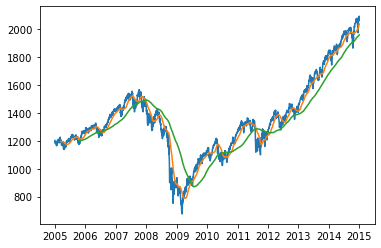

In [10]:
#draw graph
plt.plot(price.Close)
plt.plot(price.Fast_MA)
plt.plot(price.Slow_MA)

plt.show()

In [11]:
#determine entries
price['Long'] = price.Fast_MA > price.Slow_MA
price.tail()

,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long
Date,,,,,,,,,
2014-12-24,2083.250000,2081.879883,0.999342,18430.344448,18442.473741,12.129293,2019.272600,1953.167598,True
2014-12-26,2084.300049,2088.770020,1.002145,18469.869995,18469.869995,0.000000,2023.798201,1954.379748,True
2014-12-29,2087.629883,2090.570068,1.001408,18495.882673,18495.882673,0.000000,2028.354402,1955.626948,True
2014-12-30,2088.489990,2080.350098,0.996102,18423.794945,18495.882673,72.087728,2032.226204,1956.734549,True
2014-12-31,2082.110107,2058.899902,0.988853,18218.416729,18495.882673,277.465944,2035.324001,1957.667798,True


In [12]:
#calculate return when in market
price['Sys_Return'] = np.where(price.Long.shift(1) == True, price.Return, 1)
price.tail()

,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long,Sys_Return
Date,,,,,,,,,,
2014-12-24,2083.250000,2081.879883,0.999342,18430.344448,18442.473741,12.129293,2019.272600,1953.167598,True,0.999342
2014-12-26,2084.300049,2088.770020,1.002145,18469.869995,18469.869995,0.000000,2023.798201,1954.379748,True,1.002145
2014-12-29,2087.629883,2090.570068,1.001408,18495.882673,18495.882673,0.000000,2028.354402,1955.626948,True,1.001408
2014-12-30,2088.489990,2080.350098,0.996102,18423.794945,18495.882673,72.087728,2032.226204,1956.734549,True,0.996102
2014-12-31,2082.110107,2058.899902,0.988853,18218.416729,18495.882673,277.465944,2035.324001,1957.667798,True,0.988853


In [13]:
#calculate system balance
price['Sys_Bal'] = START_BALANCE * price.Sys_Return.cumprod()

price.tail()

,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long,Sys_Return,Sys_Bal
Date,,,,,,,,,,,
2014-12-24,2083.250000,2081.879883,0.999342,18430.344448,18442.473741,12.129293,2019.272600,1953.167598,True,0.999342,20681.124605
2014-12-26,2084.300049,2088.770020,1.002145,18469.869995,18469.869995,0.000000,2023.798201,1954.379748,True,1.002145,20725.477154
2014-12-29,2087.629883,2090.570068,1.001408,18495.882673,18495.882673,0.000000,2028.354402,1955.626948,True,1.001408,20754.666595
2014-12-30,2088.489990,2080.350098,0.996102,18423.794945,18495.882673,72.087728,2032.226204,1956.734549,True,0.996102,20673.775254
2014-12-31,2082.110107,2058.899902,0.988853,18218.416729,18495.882673,277.465944,2035.324001,1957.667798,True,0.988853,20443.315509


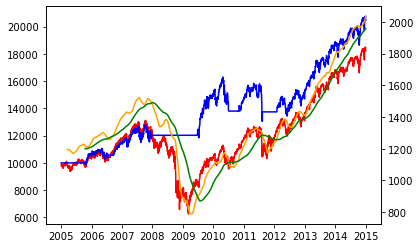

In [14]:
#plot the system balance vs the benchmark balance

fig, ax = plt.subplots()
ax.plot(price.Bench_Bal, color = 'red')
ax.plot(price.Sys_Bal, color = 'blue')

ax2 = ax.twinx()
ax2.plot(price.Fast_MA, color = 'orange')
ax2.plot(price.Slow_MA, color = 'green')

plt.show()

In [15]:
#calculate drawdown
price['Sys_Peak'] = price['Sys_Bal'].cummax()

price['Sys_DD'] = price['Sys_Peak'] - price['Sys_Bal']

price.tail()
sys_dd = round(((price.Sys_DD / price.Sys_Peak).max()) * -100, 2)

In [16]:
#calculate metrics
bench_return = round(((price.Bench_Bal[-1]/price.Bench_Bal[0]) - 1) * 100, 2)
bench_cagr = round(((((price.Bench_Bal[-1]/price.Bench_Bal[0])**(1/YEARS))-1)*100), 2)
sys_return = round(((price.Sys_Bal[-1]/price.Sys_Bal[0]) - 1) * 100, 2)
sys_cagr = round(((((price.Sys_Bal[-1]/price.Sys_Bal[0])**(1/YEARS))-1)*100), 2)

print(f'Benchmark Total return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}')
print(f'Benchmark DD: {bench_dd}%')
print('')
print(f'System Total return: {sys_return}%')
print(f'System CAGR: {sys_cagr}')
print(f'Benchmark CAGR: {sys_dd}%')

Benchmark Total return: 83.68%
Benchmark CAGR: 6.27
Benchmark DD: -52.29%

System Total return: 104.43%
System CAGR: 7.41
Benchmark CAGR: -19.86%
